# PyloXyloto: a homemade Deep Learning Framework
Welcome to our humble framework documentaion ^ _ ^  

> PyloXyloto is a Python-based deep learning framework that provides specialized toolboxes for working with machine learning and neural networks projects. it offers some functions for designing, training and validating deep neural networks, through a high level programming interface with just a few lines of codes.

**Modules:**

- Layers Module: 
  - FCLayer (Fully Connected Layer)
  - ConvLayer (Convolution Layer)
  - ActivationLayer
  - FlattenLayer
  - SoftmaxLayer
- Activation Functions (with its derivatives) Module:
  - sigmoid
  - tanh
  - relu
  - softmax
  - sign
- Losses Module:
  - mse (Mean Square Error)
  - perceptroncriterion (Perceptron Criterion)
  - Hinge
  - crossentropy (Cross Entropy)
  - loglikelihood (with identity and with sigmoid)
- Evaluation Metrics Module:
  - Confussion Matrix
  - Precision
  - Recall
  - Accuracy
  - F1 Score
- Utilis Module:
  - label_encoder
  - label_decoder
  - batch_normalization
  - zero_pad
  - load_model
  - save_model
- Network Module:
  - add_layer
  - set_loss
  - train
  - predict_output
- Data Module:
  - load_data
  - save_data
  - split_data
  - normalize_data
- Visualization Module:
  - visualize
  - draw
  - show_image

**Design:**


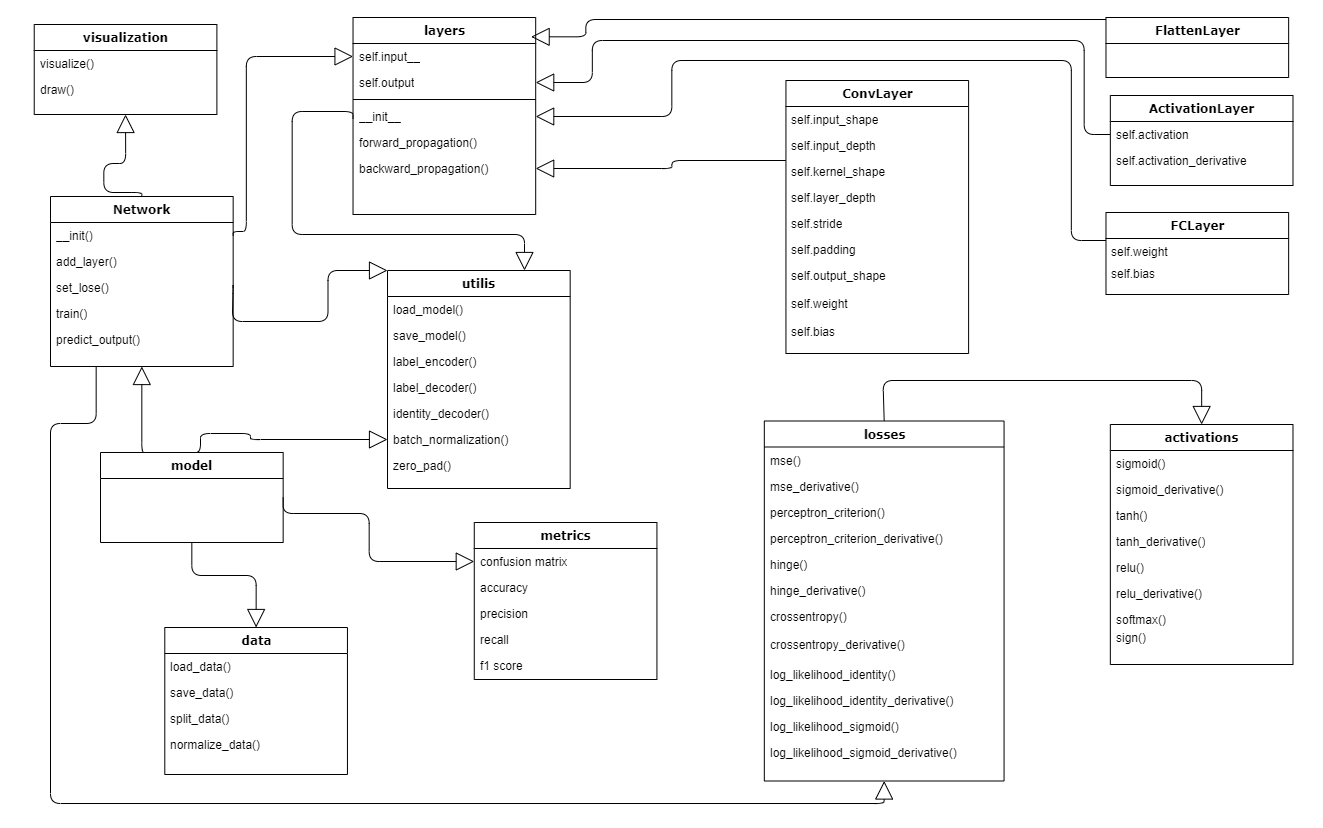


**How to use it**

- Make sure you have (numpy, pandas, matplotlib, pickle) installed.
- Clone the repository to your system and place the PyloXyloto folder in your project directory.
- Follow the steps in the (xor_fc.py, mnist_fc.py, mnist_conv.py) to build your own network and Voila!. 


### Enough talking...let's try it !

P.S. We didn't manage to puplish our framework on pypi so unfortunately we can't run it on colab and for now we'll just leave the code here and hope for a future upgrade (XD)


Here we'll try 3 different examples to test our framework:
  - Xor with FCLayer
  - Mnist with FCLayer
  - Mnist with ConvLayer




**1- Xor with FCLayer**


In [ ]:

# import the required modules
from net import Network
from layers import *
from activations import *
from losses import *
from metrics import *
from visualization import *
from utils import *

# training data
x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]]])

# build the network
net = Network()
net.add_layer(FCLayer(2, 3))
net.add_layer(ActivationLayer(tanh, tanh_derivative))
net.add_layer(FCLayer(3, 1))
net.add_layer(ActivationLayer(tanh, tanh_derivative))

# train data
net.set_loss(mse, mse_derivative)
error_per_epoch, accuracy_per_epoch = net.train(x_train, y_train, epochs=1000, learning_rate=0.1)


# test the network and hope that it works ^_^
out = net.predict_output(x_train)
out_decoded = label_decoder(out)
label_decoded = list(np.squeeze(y_train))
print(out, end="\n")
print(out_decoded, end="\n")
print(label_decoded, end="\n")


# calculate confusion matrix, accuracy, precision, recall, f1 score
conf_matrix = evaluation_metric(label_decoded, out_decoded, 'confusion matrix')
accuracy = evaluation_metric(label_decoded, out_decoded, 'accuracy')
precision = evaluation_metric(label_decoded, out_decoded, 'precision')
recall = evaluation_metric(label_decoded, out_decoded, 'recall')
f1 = evaluation_metric(label_decoded, out_decoded, 'f1')

print("confusion matrix:")
print(conf_matrix, end="\n")
print("Total Accuracy: ", accuracy, end="\n")
print("Total Precision: ", precision, end="\n")
print("Total Recall: ", recall, end="\n")
print("F1 score: ", f1, end="\n")

# save model to use it later
model = [x_train, y_train, out]
save_model('D:/Projects/PyloXyloto/models', 'xor_fc', model)


**2- Mnist with FCLayer**


In [ ]:
# import the required modules
from net import Network
from layers import FCLayer, ActivationLayer
from activations import tanh, tanh_derivative
from losses import mse, mse_derivative
from utils import *
from data import *
from visualization import *
from metrics import *
import pickle

# load MNIST data from a csv file
dataset, x, y = load_data('D:/Projects/PyloXyloto/data/train.csv')
x_train, x_test, y_train, y_test = split_data(dataset, 0.7)
# training data : 0.7*42000 samples

# normalize value to [0, 1]
x_train = normalize_data(x_train)
# reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float64')
# encode output which is a number in range [0,9] into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = label_encoder(y_train)

# do the same for test data
x_test = normalize_data(x_test)
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float64')
y_test = label_encoder(y_test)


# build the Network
net = Network()
net.add_layer(FCLayer(28*28, 100))                # input_shape=(1, 28*28)    ;   output_shape=(1, 100)
net.add_layer(ActivationLayer(tanh, tanh_derivative))
net.add_layer(FCLayer(100, 50))                   # input_shape=(1, 100)      ;   output_shape=(1, 50)
net.add_layer(ActivationLayer(tanh, tanh_derivative))
net.add_layer(FCLayer(50, 10))                    # input_shape=(1, 50)       ;   output_shape=(1, 10)
net.add_layer(ActivationLayer(tanh, tanh_derivative))

# train on 1000 samples
# as we didn't implemented mini-batch GD, training will be pretty slow if we update at each iteration on 60000 samples.
net.set_loss(mse, mse_derivative)
error_per_epoch, accuracy_per_epoch = net.train(x_train[0:1000], y_train[0:1000], epochs=100, learning_rate=0.1)

# test on 100 samples and print predicted and true values
out = net.predict_output(x_test[0:100])
out_decoded_identity = identity_decoder(out)
out_decoded = label_decoder(out_decoded_identity)
label_decoded = label_decoder(y_test[0:100])
print("\n")
print("encoded predicted values : ")
print(out, end="\n")
print("identity encoded predicted values : ")
print(out_decoded_identity, end="\n")
print("predicted values : ")
print(out_decoded, end="\n")
print("\n")
print("identity encoded true values : ")
print(y_test[0:100], end="\n")
print("true values : ")
print(label_decoded, end="\n")

# calculate confusion matrix, accuracy, precision, recall, f1 score
conf_matrix = evaluation_metric(label_decoded, out_decoded, 'confusion matrix')
accuracy = evaluation_metric(label_decoded, out_decoded, 'accuracy')
precision = evaluation_metric(label_decoded, out_decoded, 'precision')
recall = evaluation_metric(label_decoded, out_decoded, 'recall')
f1 = evaluation_metric(label_decoded, out_decoded, 'f1')

print("confusion matrix:")
print(conf_matrix, end="\n")
print("Total Accuracy: ", accuracy, end="\n")
print("Total Precision: ", precision, end="\n")
print("Total Recall: ", recall, end="\n")
print("F1 score: ", f1, end="\n")

# visualize error per each epoch
epochs = 100
show_image(x_test[0:100], y_test[0:100], out)
draw([k+1 for k in range(epochs)], error_per_epoch, 'Epochs', 'Error')
draw([k+1 for k in range(epochs)], accuracy_per_epoch, 'Epoch', 'Accuracy')

# save model
model = [x_train, x_test, y_train, y_test, label_decoded, out_decoded]
save_model('D:/Projects/PyloXyloto/models', 'mnist_fc', model)



**3- Mnist with ConvLayer**


In [ ]:
# import the required modules
from net import Network
from layers import *
from activations import tanh, tanh_derivative
from losses import mse, mse_derivative
from data import *
from visualization import *
from utils import *
from metrics import *

# load MNIST data from a csv file
dataset, x, y = load_data('D:/Projects/PyloXyloto/data/train.csv')
x_train, x_test, y_train, y_test = split_data(dataset, 0.7)
# training data : 0.7*42000 samples

# normalize value to [0, 1]
x_train = normalize_data(x_train)
# reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float64')
# encode output which is a number in range [0,9] into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = label_encoder(y_train)

# same for test data
x_test = normalize_data(x_test)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test = x_test.astype('float64')
y_test = label_encoder(y_test)

# build the Network
net = Network()
# input_shape=(28, 28, 1)   ;   output_shape=(28, 28, 1)
net.add_layer(ConvLayer(input_shape=(28, 28, 1), kernel_shape=(3, 3), layer_depth=1, stride=1, padding=1))
net.add_layer(ActivationLayer(tanh, tanh_derivative))
net.add_layer(FlattenLayer())                     # input_shape=(28, 28, 1)   ;   output_shape=(1, 28*28*1)
net.add_layer(FCLayer(28*28*1, 100))              # input_shape=(1, 28*28*1)  ;   output_shape=(1, 100)
net.add_layer(ActivationLayer(tanh, tanh_derivative))
net.add_layer(FCLayer(100, 10))                   # input_shape=(1, 100)      ;   output_shape=(1, 10)
net.add_layer(ActivationLayer(tanh, tanh_derivative))

# train on 1000 samples
# as we didn't implement mini-batch GD, training will be pretty slow if we update at each iteration on 60000 samples.
net.set_loss(mse, mse_derivative)
error_per_epoch, accuracy_per_epoch = net.train(x_train[0:1000], y_train[0:1000], epochs=100, learning_rate=0.01)

# test on 100 samples and print predicted and true values
out = net.predict_output(x_test[0:100])
out_decoded_identity = identity_decoder(out)
out_decoded = label_decoder(out_decoded_identity)
label_decoded = label_decoder(y_test[0:100])
print("\n")
print("encoded predicted values : ")
print(out, end="\n")
print("identity encoded predicted values : ")
print(out_decoded_identity, end="\n")
print("predicted values : ")
print(out_decoded, end="\n")
print("\n")
print("identity encoded true values : ")
print(y_test[0:100], end="\n")
print("true values : ")
print(label_decoded)

# calculate confusion matrix, accuracy, precision, recall, f1 score
conf_matrix = evaluation_metric(label_decoded, out_decoded, 'confusion matrix')
accuracy = evaluation_metric(label_decoded, out_decoded, 'accuracy')
precision = evaluation_metric(label_decoded, out_decoded, 'precision')
recall = evaluation_metric(label_decoded, out_decoded, 'recall')
f1 = evaluation_metric(label_decoded, out_decoded, 'f1')

print("confusion matrix:")
print(conf_matrix, end="\n")
print("Total Accuracy: ", accuracy, end="\n")
print("Total Precision: ", precision, end="\n")
print("Total Recall: ", recall, end="\n")
print("F1 score: ", f1, end="\n")

# visualize error and accuracy per each epoch
epochs = 100
show_image(x_test[0:100], y_test[0:100], out)
draw([k+1 for k in range(epochs)], error_per_epoch, 'Epoch', 'Error')
draw([k+1 for k in range(epochs)], accuracy_per_epoch, 'Epoch', 'Accuracy')

# save model
model = [x_train, x_test, y_train, y_test, label_decoded, out_decoded]
save_model('D:/Projects/PyloXyloto/models', 'mnist_conv', model)



